In [1]:
import pyrealsense2.pyrealsense2 as rs
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

directory = "framesets/paper"
filename = "Classroom_20_Rick"

## Show Frameset With Detected Face

In [2]:
# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()
colorizer = rs.colorizer()

rs.config.enable_device_from_file(config, os.path.join(directory, filename + ".bag"))
config.enable_stream(rs.stream.depth, rs.format.z16, 30)
config.enable_stream(rs.stream.color, rs.format.bgr8, 30)

# Start the pipeline
profile = pipeline.start(config)

# Extract depth scale
depth_scale = profile.get_device().first_depth_sensor().get_depth_scale()

# Initialize the Haar-cascade classifier
face_cascade = cv2.CascadeClassifier();
face_cascade.load("ext/haarcascade_frontalface_default.xml");

# Wait for a coherent pair of frames: depth and color
frames = pipeline.wait_for_frames()
depth_frame = frames.get_depth_frame()
depth_color_frame = rs.colorizer().colorize(depth_frame)
color_frame = frames.get_color_frame()

# Convert images to numpy arrays
depth_image = np.asanyarray(depth_frame.get_data())
depth_colormap = np.asanyarray(depth_color_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

depth_colormap_dim = depth_colormap.shape
color_colormap_dim = color_image.shape

# Apply Haar-cascade classifier
faces = face_cascade.detectMultiScale(gray_image)

# Extract a copy of the original images to draw onto
color_image_display = color_image.copy()
depth_colormap_display = depth_colormap.copy()

if len(faces) > 1:
    print("Warning! Multiple Faces Detected!")
elif len(faces) < 1:
    print("Warning! No Faces Detected!")

for (x,y,w,h) in faces:
    cv2.rectangle(color_image_display, (x, y), (x+w, y+h), (0, 0, 255), 1)
    cv2.rectangle(depth_colormap_display, (x, y), (x+w, y+h), (0, 0, 255), 1)
    extracted_face_color = color_image[y:y+h,x:x+w]
    extracted_face_depth = depth_image[y:y+h,x:x+w]
    extracted_face_depth_colormap = depth_colormap[y:y+h,x:x+w]

# If depth and color resolutions are different, resize color image to match depth image for display
if depth_colormap_dim != color_colormap_dim:
    resized_color_image = cv2.resize(color_image_display, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
    images = np.hstack((resized_color_image, depth_colormap_display))
else:
    images = np.hstack((color_image_display, depth_colormap_display))

# Show images
cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
cv2.imshow('RealSense', images)

while True:
    key = cv2.waitKey(1)
    # Press esc or 'q' to close the image window
    if key & 0xFF == ord('q') or key == 27:
        cv2.destroyAllWindows()
        pipeline.stop()
        break

RuntimeError: Frame didn't arrive within 5000

## Show Detected Face

In [3]:
cv2.namedWindow("Detected Face", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Detected Face", np.hstack((extracted_face_color, extracted_face_depth_colormap)))

while True:
    key = cv2.waitKey(1)
    # Press esc or 'q' to close the image window
    if key & 0xFF == ord('q') or key == 27:
        cv2.destroyAllWindows()
        break

## Save Detected Face

In [ ]:
cv2.imwrite(os.path.join("faces", filename + ".png"), extracted_face_color)

True

## Show Depth Histogram of Detected Face

Depth Scale: 1.0 mm


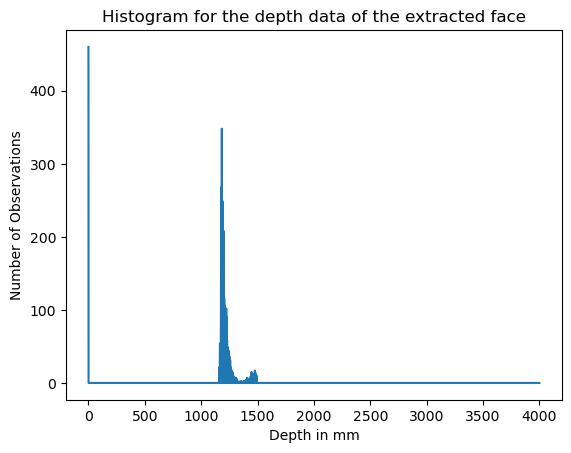

In [4]:
print("Depth Scale: {} mm".format(np.round(depth_scale*1000)))

histogram = cv2.calcHist([extracted_face_depth], [0], None, [4000], [0,4000]) # Max range of 4000
plt.plot(histogram)
plt.title("Histogram for the depth data of the extracted face")
plt.xlabel("Depth in mm")
plt.ylabel("Number of Observations")
plt.show()

Depth Scale: 1.0 mm


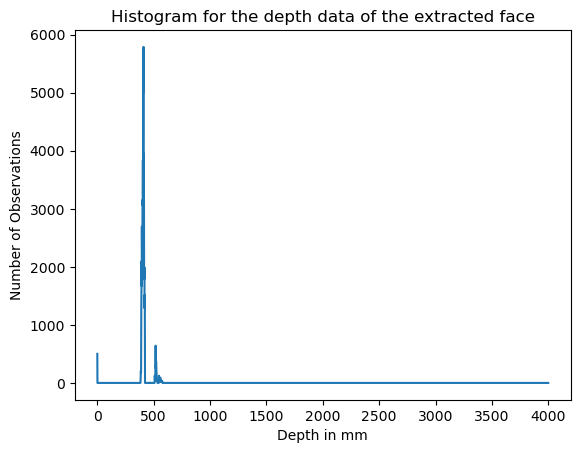

In [ ]:
print("Depth Scale: {} mm".format(np.round(depth_scale*1000)))

histogram = cv2.calcHist([extracted_face_depth], [0], None, [4000], [0,4000]) # Max range of 4000
plt.plot(histogram)
plt.title("Histogram for the depth data of the extracted face")
plt.xlabel("Depth in mm")
plt.ylabel("Number of Observations")
plt.show()